# OpenSoundscape Audio Reader
- Exploratory notebook to develop a method to read .flac .wav and .mp3 audio files from disk. 
- Audio files will also be linked to a pandas dataframe.
- crops or loops audio to 3 second or other chosen duration

<br><br>

To Do:
- Load all of the clips and look at their lengths. 
- Create a batch of spectrograms saved to disk
- re-scale the spectrograms so that the frequency scale is centered on and bounded by the typical vocalization freq of the olive sided flycatcher.

In [20]:
from pathlib import Path
from opensoundscape import Audio, Spectrogram
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [3]:
!pwd

/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory


Set relative paths. 

In [22]:
data_path = Path('../../data/')
audio_read_path = Path('../../data/raw/recordings/')
image_save_path = Path('../../data/processed/img')
audio_save_path = Path('../../data/processed/audio')

# Load processed dataframe. 

In [26]:
df = pd.read_pickle(data_path/'processed/processed_metadata.pkl')

In [27]:
df

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,right_freq_filter_tag_min_level,right_freq_filter_tag_max_level,right_freq_filter_tag_peak_level_dbfs,tagged_in_wildtrax,url,tag_spectrogram_url,clip_url,sensorId,tasks,status
0,BU,Alberta Archetypes,1501,BBS-4139-20,87850,2021-07-03 06:56:02,331758,None,595843,Transcribed,...,NaN,NaN,NaN,f,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active
1,BU,Alberta Archetypes,1501,BBS-4139-27,87844,2021-07-03 07:42:01,331765,None,595844,Transcribed,...,NaN,NaN,NaN,f,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active
2,BU,Alberta Archetypes,1501,BBS-4139-28,87842,2021-07-03 07:47:01,331764,None,595845,Transcribed,...,NaN,NaN,NaN,f,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active
3,BU,Alberta Archetypes,1501,BBS-4139-28,87842,2021-07-03 07:47:01,331764,None,595845,Transcribed,...,NaN,NaN,NaN,f,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active
4,BU,Alberta Archetypes,1501,BBS-4139-36,87834,2022-06-26 08:24:04,358620,None,595846,Transcribed,...,NaN,NaN,NaN,f,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152834,BU,Zeller Woodpeckers- Time of Day,1241,Y-39-414-E,43945,2016-05-15 05:21:00,480742,None,442500,Transcribed,...,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active
1152835,BU,Zeller Woodpeckers- Time of Day,1241,Y-58-421-C,43958,2018-06-07 03:44:00,480766,None,442524,Transcribed,...,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active
1152836,BU,Zeller Woodpeckers- Time of Day,1241,Y-7-253-SW,303,2018-06-17 05:05:00,480207,None,441965,Transcribed,...,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active
1152837,BU,Zeller Woodpeckers- Time of Day,1241,Y-7-253-SW,303,2018-06-17 06:05:00,480596,None,442354,Transcribed,...,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active


In [5]:
audio_files = glob(str(audio_read_path)+'/*')
audio_files[:10], len(audio_files)

(['../../data/raw/recordings/295266.mp3',
  '../../data/raw/recordings/292509.mp3',
  '../../data/raw/recordings/293617.mp3',
  '../../data/raw/recordings/296009.mp3',
  '../../data/raw/recordings/291772.mp3',
  '../../data/raw/recordings/555254.flac',
  '../../data/raw/recordings/44815.mp3',
  '../../data/raw/recordings/298030.mp3',
  '../../data/raw/recordings/576164.flac',
  '../../data/raw/recordings/295272.mp3'],
 3563)

## A quick exploration of the opensoundscape audio / spec tutorial on flac and mp3
flac first

In [6]:
image_shape = (224,224)

In [7]:
audio = Audio.from_file(audio_read_path/'479470.flac')

In [8]:
audio

<Audio(samples=(104738,), sample_rate=44100)>

In [9]:
spec = Spectrogram.from_audio(audio)

In [10]:
image = spec.to_image(shape=image_shape, invert=True)

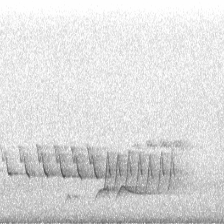

In [11]:
image

Already we see an image which might not be an olive sided flycatcher. 

Turn this into a function then try on an mp3. 

In [12]:
def show_spec_from_audio(clip_name):
    audio = Audio.from_file(audio_read_path/clip_name)
    spec = Spectrogram.from_audio(audio)
    image = spec.to_image(shape=image_shape, invert=True)
    return image

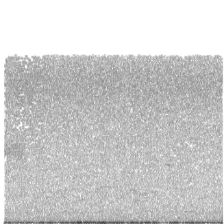

In [13]:
show_spec_from_audio('100027.mp3')

# Loading multiuple audio files

In [14]:
audio_files = glob('../../data/raw/recordings/*')
audio_files[0]

'../../data/raw/recordings/295266.mp3'

In [15]:
first_10 = audio_files[:10]

# Trim the audio to 3s length or loop the sample
using crop off the end or concatenation of the start onto the end until the length is achieved

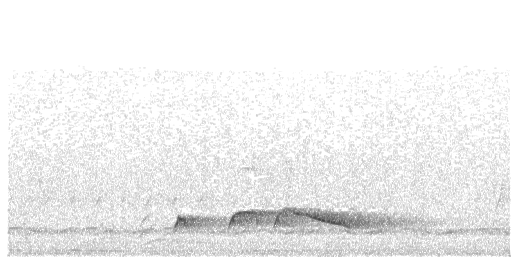

In [16]:
audio_file = Audio.from_file(audio_files[0])
spec = Spectrogram.from_audio(audio_file)
image = spec.to_image(invert=True)
image

In [19]:
clip_length = float(3.0)

def generate_equal_length_clips(clip_length):
    equal_length_clips = []

    for audio_file in first_10:
        audio = Audio.from_file(audio_file)
        if audio.duration < clip_length:
            audio = audio.loop(clip_length)
            print('sample extended by looping')
        elif audio.duration > clip_length:
            audio = audio.extend_to(clip_length)
            print('audio file trimmed')
        elif audio.duration == clip_length:
            pass
        spec = Spectrogram.from_audio(audio)
        spec.to_image(image_shape, invert=True)
        equal_length_clips.append(audio)
        
    return equal_length_clips
    
equal_length_clips = generate_equal_length_clips(clip_length)
equal_length_clips

sample extended by looping
sample extended by looping
sample extended by looping
sample extended by looping
sample extended by looping
sample extended by looping
sample extended by looping
sample extended by looping
sample extended by looping
sample extended by looping


[<Audio(samples=(132300,), sample_rate=44100)>,
 <Audio(samples=(132300,), sample_rate=44100)>,
 <Audio(samples=(132300,), sample_rate=44100)>,
 <Audio(samples=(132300,), sample_rate=44100)>,
 <Audio(samples=(132300,), sample_rate=44100)>,
 <Audio(samples=(132300,), sample_rate=44100)>,
 <Audio(samples=(144000,), sample_rate=48000)>,
 <Audio(samples=(132300,), sample_rate=44100)>,
 <Audio(samples=(132300,), sample_rate=44100)>,
 <Audio(samples=(132300,), sample_rate=44100)>]

In [ ]:
image_shape = (224,224)

plt.figure()
plt.subplot(2,1,1)
idx = 0
audio = equal_length_clips[idx]
spec = Spectrogram.from_audio(audio)
spec.plot(fname=image_save_path/'test.png')

plt.subplot(2,1,2)
idx += 1

audio = equal_length_clips[idx]
spec = Spectrogram.from_audio(audio)
spec.plot(fname=image_save_path/'test.png')